In [1]:
from iqtools import *
%matplotlib inline

In [2]:
def largest_power_of_2(n):
    power = 1
    while power * 2 < n:
        power *= 2
    return power

In [3]:
filepath = "/data.local/G22-00018_00203/data/analyzers/RSA01/RSA01-2025.04.09.04.14.25.730.tiq"
filepath = "/home/gpuuser/personall_directories/cforconi/data/2024.05.16/home/gpuuser/sshfs_mounts/lustre/ap/litv-exp/2024-05-12_E018_TwoPhotonDecay_ssanjari/analyzers/RSA01_P1/RSA01-2024.05.16.02.00.58.711.tiq"

#filepath = "/home/gpuuser/sshfs_mounts/lustre/astrum/cforconi/data_analysis/npz_files/npz_files_list/RSA01-2025.04.02.07.47.49.314.tiq_spectrogram.npz"
#filepath = "/home/gpuuser/sshfs_mounts/lustre/ap/litv-exp/2024-05-12_E018_TwoPhotonDecay_ssanjari/analyzers/RSA01_P1/RSA01-2024.05.16.18.23.56.891.tiq"
filename = os.path.basename(filepath)

In [4]:
iq = get_iq_object(filepath)
lframes = 2**16
freq_bin_size = iq.fs/lframes
t_bin_size = 1/freq_bin_size
nframes = int((iq.nsamples_total/iq.fs)/t_bin_size)
#nframes = largest_power_of_2(iq.nsamples_total / lframes)
AVG = 4
print("lframes: ",lframes,"\nnframes :", nframes)
print("Total Number of Samples: ", iq.nsamples_total)
print("Center Frequency :", iq.center, "Hz")
print("Sampling Rate :", iq.fs / 10**6, "MHz")
print("Freq bin size :", freq_bin_size)


lframes:  65536 
nframes : 171
Total Number of Samples:  11250000
Center Frequency : 408395500.0 Hz
Sampling Rate : 6.25 MHz
Freq bin size : 95.367431640625


In [5]:
iq.read(lframes=lframes, nframes=nframes)

In [6]:
iq.method="fftw"
xx, yy, zz = iq.get_power_spectrogram(lframes=lframes, nframes=nframes)

In [7]:
diff_original = np.diff(xx[100])  # Differences in xx
print(diff_original)

[95.25 95.5  95.25 ... 95.25 95.5  95.25]


In [8]:
xx_av, yy_av, zz_av = tools.get_averaged_spectrogram(xx, yy, zz, every=3)

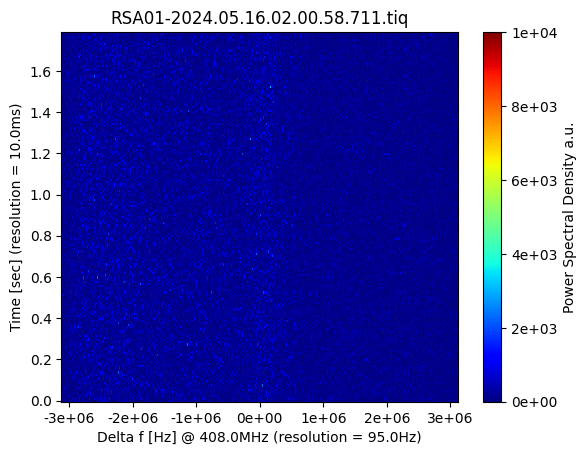

In [9]:
plot_spectrogram(xx, yy, zz, cen=iq.center, title=f"{filename}",
                 decimal_place=0,
                 dbm=False,
                 zzmax=10000,
                 zzmin=0,
                 mask=True,
                 )

In [17]:
y_start = 0
#y_end = 
y_end = 1.6

sly = slice(int(y_start/t_bin_size), int(y_end/t_bin_size))
slx = slice(int(lframes/2) - 160, int(lframes/2) -80)
slx = slice(32760, 32780)

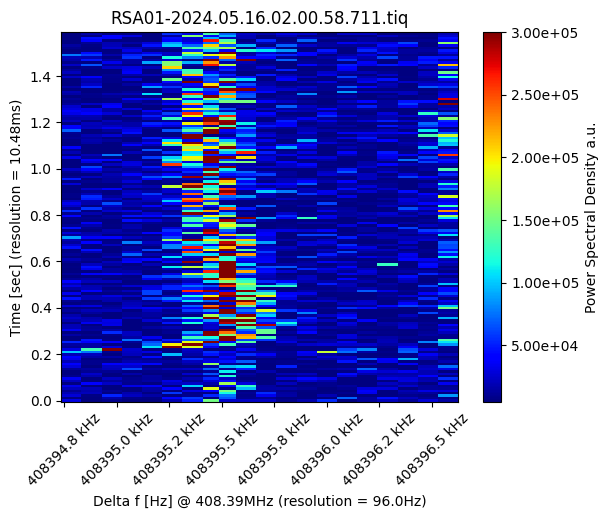

In [18]:
fig2, ax = plt.subplots()

plot_spectrogram(xx[sly,slx] + iq.center, yy[sly,slx] , zz[sly,slx], cen=iq.center, title=f"{filename}",      
                cmap="jet",     # colour scheme
                dpi=300,        # png resolution
                dbm=False,      # display in dBm scale
                filename=None,  # if None, no file is produced
                zzmin=5000,
                zzmax=300000,
                mask=False,     # mask out entries below this value
                decimal_place=2,
                )

plt.xticks(rotation=45)  # Rotate labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.1f} kHz"))

plt.show()

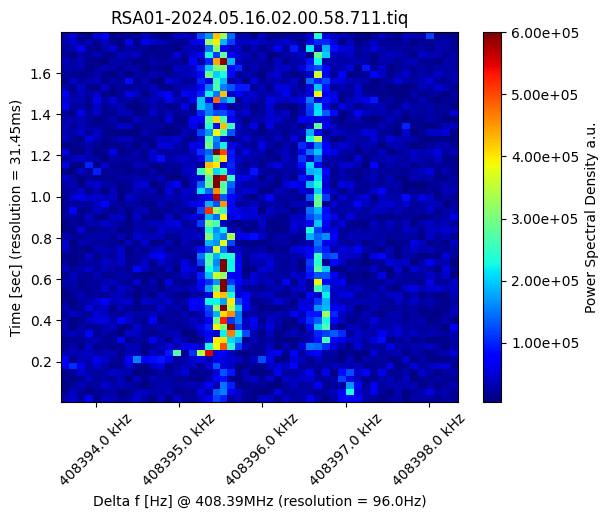

In [12]:
fig3, ax = plt.subplots()

plot_spectrogram(xx_av[sly,slx] + iq.center, yy_av[sly,slx] , zz_av[sly,slx], cen=iq.center, title=f"{filename}",
                cmap="jet",     # colour scheme
                dpi=300,        # png resolution
                dbm=False,      # display in dBm scale
                filename=None,  # if None, no file is produced
                zzmin=5000,
                zzmax=600000,
                mask=False,     # mask out entries below this value
                decimal_place=2,
                )

plt.xticks(rotation=45)  # Rotate labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.1f} kHz"))

plt.show()

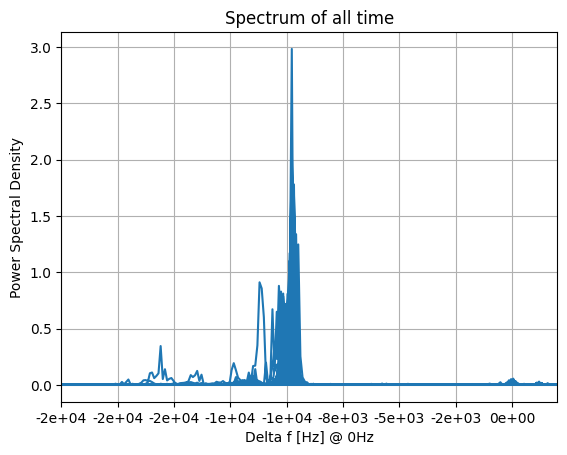

In [13]:
plotters.plot_spectrum(xx, 
                    zz, 
                    cen=0.0, 
                    span=None, 
                    dbm=False, 
                    filename=None, 
                    title='Spectrum of all time',) 
plt.xlim(-20e3, 2e3)
plt.show()

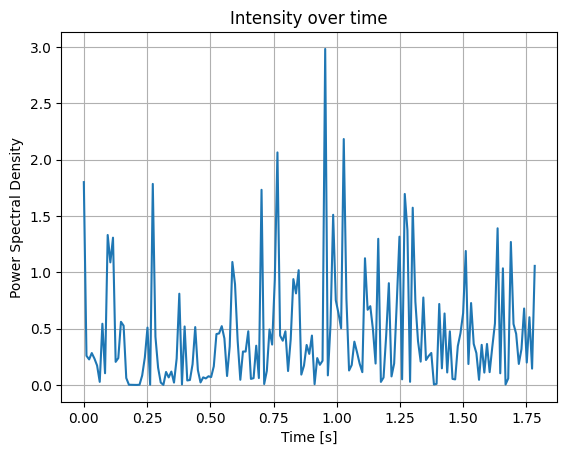

In [14]:
bin_number = np.argmax(np.mean(zz, axis=0))

plt.plot(yy[:, bin_number], zz[:, bin_number])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Power Spectral Density")
plt.title("Intensity over time")
plt.show()